In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1665407936704.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,10/07/2022,3639.66,--,3706.74,3706.74,3620.73
1,10/06/2022,3744.52,--,3771.97,3797.93,3739.22
2,10/05/2022,3783.28,--,3753.25,3806.91,3722.66
3,10/04/2022,3790.93,--,3726.46,3791.92,3726.46
4,10/03/2022,3678.43,--,3609.78,3698.35,3604.93
...,...,...,...,...,...,...
2541,10/16/2012,1454.92,--,1440.31,1455.51,1440.31
2542,10/15/2012,1440.13,--,1428.75,1441.31,1427.24
2543,10/12/2012,1428.59,--,1432.84,1438.43,1425.53
2544,10/11/2012,1432.84,--,1432.82,1443.90,1432.82


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2546.000000,2546.000000,2546.000000,2546.000000
mean,2677.129163,2654.759485,2668.738240,2639.452262
std,877.288847,920.295163,926.566477,913.192437
min,1353.330000,0.000000,0.000000,0.000000
25%,2017.547500,2010.630000,2020.982500,1995.750000
50%,2475.955000,2476.455000,2486.495000,2466.400000
75%,3124.272500,3134.792500,3142.547500,3111.740000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2687.808676,2687.482167,2701.633225,2671.986266
std,876.918671,877.160302,883.292893,870.194499
min,1353.330000,1353.360000,1360.620000,1343.350000
25%,2023.035000,2022.930000,2034.355000,2011.295000
50%,2496.840000,2497.260000,2508.850000,2478.860000
75%,3138.240000,3141.170000,3154.580000,3127.390000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2545
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

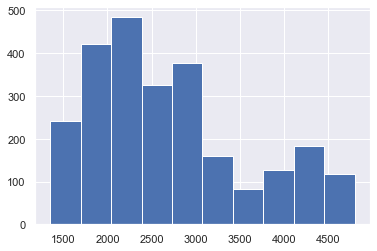

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3639.66

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2687.808675944343

In [10]:
close_sd = df['Close/Last'].std()
close_sd

876.9186711486446

In [11]:
sigma1 = close_mean + close_sd
sigma1

3564.7273470929877

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4441.646018241632

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

4880.105353815955

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2545
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-10-10 to 2022-10-07')

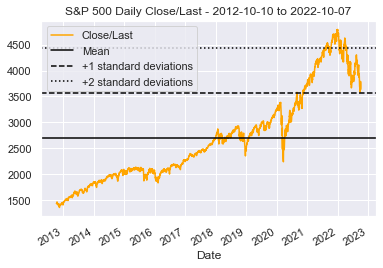

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-10-10 to 2022-10-07')

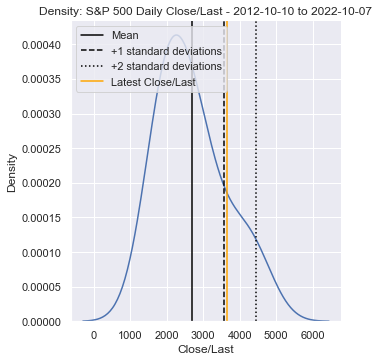

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.0854499457844369

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results